In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
donor_sup = pd.read_csv('donorschooseorg_challenge_donor_supplemental.csv')

In [3]:
donor_sup.head(2)

,Unnamed: 0,donor_hashed_id,score,vb_tsmart_city,vb_tsmart_state,vb_voterbase_marital_status,vb_etech_religion,vb_vf_party,vb_household_income_amount,vb_education,...,xpbb_behaviorbank_purchased_through_the_mail,xpbb_hhlifestylinfo_buyingprefer_info_by_email,tb_person_online_flg,tb_person_facebook_flg,xpbb_behaviorbank_donates_to_environmental_causes,xpbb_behaviorbank_contributes_to_charities,xpbb_hhlifestylcontributionshumanitarian,xpbb_hhlifestylcontributionspolitical,vb_homeowner_indicator,vb_number_of_children_in_household
0,0,00002eb25d60a09c318efbd0797bffb5,0.657954,INDIANAPOLIS,IN,Unmarried,Catholic,Unaffiliated,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0000300773fe015f870914b42528541b,0.218583,ATLANTIC CITY,NJ,Unmarried,Catholic,NaN,77.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
donor_sup.columns = ['index', 'id', 'score', 'city', 'state', 'marital_status','religion','party','household_income', 'education',
                    'gender', 'age', 'volunteer_interest', 'tv purchases', 'phone purchases', 'online purchases', 'online shopping prefered',
                    'mail purchases', 'email prefered', 'online presence', 'fb presence', 'environmental_causes_donations',
                    'charity_contributions', 'humanitarian_donations', 'political_contributions', 'homeowner', 'children in household']

In [5]:
donor_sup = donor_sup[['id', 'score', 'city', 'state', 'marital_status','religion','party','household_income', 'education',
                    'gender', 'age', 'volunteer_interest', 'tv purchases', 'phone purchases', 'online purchases', 'online shopping prefered',
                    'mail purchases', 'email prefered', 'online presence', 'fb presence', 'environmental_causes_donations',
                    'charity_contributions', 'humanitarian_donations', 'political_contributions', 'homeowner', 'children in household']]

In [6]:
children_data = donor_sup[['id', 'children in household']]

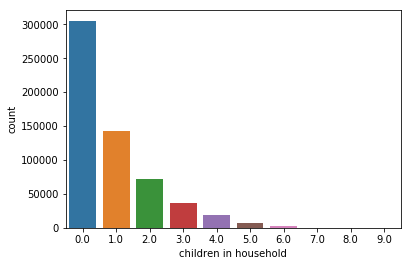

In [7]:
sns.countplot(x = 'children in household', data = children_data)

In [ ]:
#Individuals with no children were twice as likely to donate as compared to individuals with 1 child.
#Similarly, individuals with 1 child were roughly twice as likely to donate as compare to individuals with 2 children.
#Conclusion: Amongst donors, addition of one child leads to their likelihood of donating drop by half. 

In [ ]:
#Defining income brackets and looking at frequency of people in each bracket

In [8]:
income_data = donor_sup.dropna(subset = ['household_income'])
income_cols = income_data[['id', 'household_income']]

inc_upto_40 = income_cols[income_cols['household_income'] <= 40]
inc_40_to_80 = income_cols[(income_cols['household_income'] > 40) & (income_cols['household_income'] <= 80)]
inc_80_to_160 = income_cols[(income_cols['household_income'] > 80) & (income_cols['household_income'] <= 160)]
inc_160_to_200 = income_cols[(income_cols['household_income'] > 160) & (income_cols['household_income'] <= 200)]
inc_200_to_500 = income_cols[(income_cols['household_income'] > 200) & (income_cols['household_income'] <= 500)]
inc_above_500 = income_cols[income_cols['household_income'] > 500]

In [10]:
income_dict = {'upto_40_donors': len(inc_upto_40), 'inc_40_to_80_donors': len(inc_40_to_80), 'inc_80_to_160_donors': len(inc_80_to_160),
              'inc_160_to_200_donors': len(inc_160_to_200), 'inc_200_to_500_donors': len(inc_200_to_500), 
              'inc_above_500_donors': len(inc_above_500)}
income_count = pd.Series(income_dict)

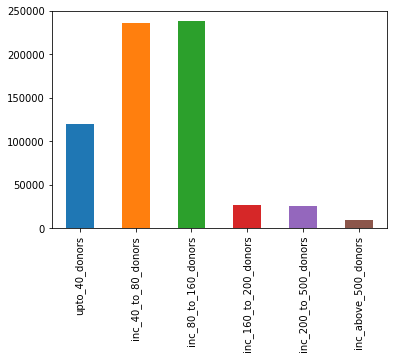

In [11]:
income_count.plot('bar')

In [ ]:
#Highest donors come from 80k-160k income bracket closely followed by 40k-80k income bracket. 
#Interestingly, individuals who earn up to 40k form the third largest category of donors.

In [ ]:
#What are the top five states where donors come from?

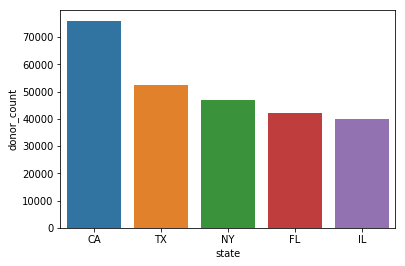

In [12]:
donor_state = donor_sup[['id', 'state']]
donor_state = donor_state.groupby('state').count()
top_5_states = donor_state.sort_values('id', ascending = False).iloc[:5]
top_5_states.reset_index(inplace = True)
top_5_states.columns = ['state', 'donor_count']
sns.barplot(x= 'state', y= 'donor_count', data = top_5_states)

In [ ]:
#What are the top 5 cities donations come from? Do the top 5 cities come from the top 5 states we just found out?

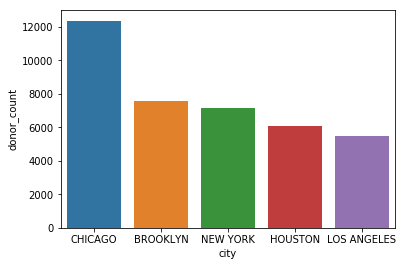

In [13]:
donor_city = donor_sup[['id', 'city']]
donor_city = donor_city.groupby('city').count()
top_5_cities = donor_city.sort_values('id', ascending = False).iloc[:5]
top_5_cities.reset_index(inplace = True)
top_5_cities.columns = ['city', 'donor_count']
sns.barplot(x= 'city', y= 'donor_count', data = top_5_cities)

In [ ]:
#Result: 2 cities from NY state are part of top 5 city donors. 
#Observation: LA is at the last position amongst top 5 city donors but California is at the first position in top 5 state donors. 
#This points out to the fact that donations coming from California are more spread out as opposed to Illinois where a bulk of 
#donations are coming from Chicago.
#Conclusion: DonorsChoose.org should try reaching out to areas outside of main cities in NY and Illinois states.